In [23]:
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import datetime as dt
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
fin = dt.datetime(2021, 4, 6)
ini = dt.datetime(2016, 1, 1)

In [3]:
df = pd.read_csv('MW-NIFTY-50-22-Mar-2021.csv')
ticker = []
for i in range(1,51):
    ticker.append(df["SYMBOL \n"][i] + '.NS')

In [4]:
df1 = pd.DataFrame()

for i in range(len(ticker)):
    try:
        o = pdr.get_data_yahoo(ticker[i],ini,fin)
        df1[str(ticker[i])] = o["Close"]
    except:
        print('error')
        print(i)

df1

,ADANIPORTS.NS,TECHM.NS,BRITANNIA.NS,TCS.NS,SUNPHARMA.NS,INFY.NS,HINDALCO.NS,DRREDDY.NS,HCLTECH.NS,HINDUNILVR.NS,...,RELIANCE.NS,SBILIFE.NS,HDFCLIFE.NS,BAJFINANCE.NS,AXISBANK.NS,HDFCBANK.NS,TATAMOTORS.NS,ICICIBANK.NS,POWERGRID.NS,INDUSINDBK.NS
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,267.549988,520.049988,1493.199951,1208.199951,815.549988,552.625000,84.900002,3108.600098,422.924988,856.549988,...,507.674988,NaN,NaN,609.585022,449.899994,544.375000,401.899994,239.091003,141.000000,963.849976
2016-01-04,257.950012,516.400024,1486.300049,1184.800049,799.099976,539.450012,80.750000,3056.000000,422.975006,859.000000,...,497.649994,NaN,NaN,605.244995,438.399994,535.250000,377.049988,232.317993,140.949997,934.200012
2016-01-05,255.699997,521.900024,1483.349976,1174.474976,800.500000,537.025024,82.599998,3070.649902,421.399994,847.950012,...,502.575012,NaN,NaN,599.784973,436.450012,531.200012,374.450012,233.363998,139.149994,935.250000
2016-01-06,251.800003,525.099976,1500.849976,1190.800049,791.950012,534.674988,80.550003,3046.250000,420.700012,843.049988,...,516.099976,NaN,NaN,610.724976,430.700012,533.549988,365.899994,227.363998,139.500000,943.950012
2016-01-07,245.000000,510.799988,1473.275024,1185.625000,783.799988,525.400024,76.650002,2991.800049,412.524994,820.250000,...,506.625000,NaN,NaN,610.630005,409.250000,528.099976,343.549988,224.317993,138.100006,925.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-30,710.549988,1016.900024,3616.000000,3158.550049,597.700012,1385.300049,326.299988,4518.200195,995.799988,2398.750000,...,2029.300049,872.150024,687.750000,5193.549805,695.349976,1553.699951,297.049988,591.450012,221.350006,961.049988
2021-03-31,702.400024,991.450012,3625.050049,3177.850098,597.799988,1368.050049,326.850006,4516.000000,982.650024,2431.500000,...,2003.099976,880.849976,696.200012,5149.850098,697.450012,1493.650024,301.799988,582.099976,215.649994,954.450012
2021-04-01,736.250000,992.150024,3618.500000,3165.000000,610.750000,1385.199951,350.250000,4587.649902,1002.599976,2399.100098,...,2021.849976,883.450012,691.000000,5272.149902,713.000000,1486.750000,307.750000,594.400024,218.699997,993.299988


In [5]:
df1 = df1.dropna(axis=1)
df1

,ADANIPORTS.NS,TECHM.NS,BRITANNIA.NS,TCS.NS,SUNPHARMA.NS,INFY.NS,HINDALCO.NS,DRREDDY.NS,HCLTECH.NS,HINDUNILVR.NS,...,ONGC.NS,SBIN.NS,RELIANCE.NS,BAJFINANCE.NS,AXISBANK.NS,HDFCBANK.NS,TATAMOTORS.NS,ICICIBANK.NS,POWERGRID.NS,INDUSINDBK.NS
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,267.549988,520.049988,1493.199951,1208.199951,815.549988,552.625000,84.900002,3108.600098,422.924988,856.549988,...,161.666672,227.800003,507.674988,609.585022,449.899994,544.375000,401.899994,239.091003,141.000000,963.849976
2016-01-04,257.950012,516.400024,1486.300049,1184.800049,799.099976,539.450012,80.750000,3056.000000,422.975006,859.000000,...,158.699997,220.699997,497.649994,605.244995,438.399994,535.250000,377.049988,232.317993,140.949997,934.200012
2016-01-05,255.699997,521.900024,1483.349976,1174.474976,800.500000,537.025024,82.599998,3070.649902,421.399994,847.950012,...,161.233337,217.750000,502.575012,599.784973,436.450012,531.200012,374.450012,233.363998,139.149994,935.250000
2016-01-06,251.800003,525.099976,1500.849976,1190.800049,791.950012,534.674988,80.550003,3046.250000,420.700012,843.049988,...,158.366669,216.850006,516.099976,610.724976,430.700012,533.549988,365.899994,227.363998,139.500000,943.950012
2016-01-07,245.000000,510.799988,1473.275024,1185.625000,783.799988,525.400024,76.650002,2991.800049,412.524994,820.250000,...,151.066666,209.550003,506.625000,610.630005,409.250000,528.099976,343.549988,224.317993,138.100006,925.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-30,710.549988,1016.900024,3616.000000,3158.550049,597.700012,1385.300049,326.299988,4518.200195,995.799988,2398.750000,...,103.500000,360.799988,2029.300049,5193.549805,695.349976,1553.699951,297.049988,591.450012,221.350006,961.049988
2021-03-31,702.400024,991.450012,3625.050049,3177.850098,597.799988,1368.050049,326.850006,4516.000000,982.650024,2431.500000,...,102.150002,364.299988,2003.099976,5149.850098,697.450012,1493.650024,301.799988,582.099976,215.649994,954.450012
2021-04-01,736.250000,992.150024,3618.500000,3165.000000,610.750000,1385.199951,350.250000,4587.649902,1002.599976,2399.100098,...,104.349998,370.649994,2021.849976,5272.149902,713.000000,1486.750000,307.750000,594.400024,218.699997,993.299988


In [13]:
def CAGR(DF, name):
    df = DF.copy()
    df[name] = DF[name].pct_change()
    df[name] = (1 + df[name]).cumprod()
    n = len(df)/252 # number of years, 252 is number of trading days in a year, use 52/12 if you have weekly/monthly data
    CAGR = (df[name][-1])**(1/n) - 1
    return CAGR

In [14]:
def volatility(DF, name):
    df = DF.copy()
    df[name] = DF[name].pct_change()
    vol = df[name].std() * np.sqrt(252) # use 52/12 if you have weekly/monthly data
    return vol

In [15]:
def sharpe(x,y,rf):
    sr = (x - rf)/y
    return sr

In [16]:
name = []
for i in range(len(df1.columns)):
    name.append(df1.columns[i])
    
len(name)

48

In [17]:
rf = 0.06

In [19]:
cagr = []
vol = []
sr = []
for i in range(len(name)):
    x = CAGR(df1, name[i])
    y = volatility(df1, name[i])
    z = sharpe(x,y,rf)
    cagr.append(x)
    vol.append(y)
    sr.append(z)

[0.24786011328923907,
 0.13365214938856584,
 0.19487622473647348,
 0.21322830413222915,
 -0.051776028892081216,
 0.19994307942415657,
 0.3174162577436672,
 0.08005464729752965,
 0.18860037986406808,
 0.22263652514675814,
 0.27713109437770544,
 -0.024400988713441762,
 0.04851426981916207,
 -0.005115408029391255,
 0.07250253991698874,
 0.14946595676003427,
 0.379622840252255,
 0.05136855580309274,
 0.25168871852702646,
 0.1841812885378742,
 0.2343291263086411,
 0.2358912577198684,
 0.07223876809400998,
 -0.03298802363721853,
 0.1907474515055967,
 0.07287636979552348,
 0.14031226243240025,
 0.0418296526983728,
 0.17107668541810406,
 0.20823456386322703,
 0.0757128497566446,
 0.32991460102745584,
 0.35656081849972776,
 0.18858627550902196,
 -0.1672817618495973,
 0.10897724751929116,
 0.01419215803900098,
 0.09967127111584762,
 -0.08228817005277578,
 0.08742488442717211,
 0.3035128189598686,
 0.505196182568252,
 0.08298082621170244,
 0.2082602817239807,
 -0.05057642360756931,
 0.18237853632

In [24]:
top15 = ['ADANIPORTS.NS', 'BRITANNIA.NS', 'TCS.NS', 'HINDALCO.NS', 'HINDUNILVR.NS', 'TATASTEEL.NS', 'JSWSTEEL.NS',
        'DIVISLAB.NS', 'NESTLEIND.NS', 'ASIANPAINT.NS', 'TITAN.NS', 'BAJAJFINSV.NS', 'RELIANCE.NS', 'BAJFINANCE.NS',
        'HDFCBANK.NS']
len(top15)

15

In [26]:
df2 = pd.DataFrame()
for i in range(len(top15)):
    df2[top15[i]] = df1[top15[i]]
    
df2

,ADANIPORTS.NS,BRITANNIA.NS,TCS.NS,HINDALCO.NS,HINDUNILVR.NS,TATASTEEL.NS,JSWSTEEL.NS,DIVISLAB.NS,NESTLEIND.NS,ASIANPAINT.NS,TITAN.NS,BAJAJFINSV.NS,RELIANCE.NS,BAJFINANCE.NS,HDFCBANK.NS
Date,,,,,,,,,,,,,,,
2016-01-01,267.549988,1493.199951,1208.199951,84.900002,856.549988,245.234406,102.699997,1162.500000,5785.149902,878.750000,352.049988,1983.800049,507.674988,609.585022,544.375000
2016-01-04,257.950012,1486.300049,1184.800049,80.750000,859.000000,244.758041,104.470001,1149.699951,5669.799805,880.799988,351.399994,1959.500000,497.649994,605.244995,535.250000
2016-01-05,255.699997,1483.349976,1174.474976,82.599998,847.950012,261.335663,108.309998,1147.500000,5662.399902,900.650024,347.700012,1946.000000,502.575012,599.784973,531.200012
2016-01-06,251.800003,1500.849976,1190.800049,80.550003,843.049988,256.047974,105.820000,1137.199951,5719.500000,886.400024,347.850006,1938.550049,516.099976,610.724976,533.549988
2016-01-07,245.000000,1473.275024,1185.625000,76.650002,820.250000,238.088882,102.635002,1126.949951,5638.950195,872.349976,344.049988,1927.050049,506.625000,610.630005,528.099976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-30,710.549988,3616.000000,3158.550049,326.299988,2398.750000,800.000000,467.450012,3584.250000,17165.000000,2578.050049,1552.199951,9502.349609,2029.300049,5193.549805,1553.699951
2021-03-31,702.400024,3625.050049,3177.850098,326.850006,2431.500000,811.849976,468.450012,3622.800049,17165.199219,2537.399902,1558.050049,9668.599609,2003.099976,5149.850098,1493.650024
2021-04-01,736.250000,3618.500000,3165.000000,350.250000,2399.100098,863.049988,508.750000,3616.100098,17083.150391,2551.750000,1559.349976,9789.500000,2021.849976,5272.149902,1486.750000


In [29]:
df3 = pd.DataFrame()
for i in range(len(top15)):
    b = []
    b.append(np.nan)
    for j in range(df2.shape[0] - 1):
        b.append(np.log(df1[top15[i]][j+1]/df1[top15[i]][j]))
    df3[top15[i]] = b
    
df3 = df3.iloc[1:]
df3

,ADANIPORTS.NS,BRITANNIA.NS,TCS.NS,HINDALCO.NS,HINDUNILVR.NS,TATASTEEL.NS,JSWSTEEL.NS,DIVISLAB.NS,NESTLEIND.NS,ASIANPAINT.NS,TITAN.NS,BAJAJFINSV.NS,RELIANCE.NS,BAJFINANCE.NS,HDFCBANK.NS
1,-0.036541,-0.004632,-0.019558,-0.050116,0.002856,-0.001944,0.017088,-0.011072,-0.020140,0.002330,-0.001848,-0.012325,-0.019944,-0.007145,-0.016904
2,-0.008761,-0.001987,-0.008753,0.022652,-0.012947,0.065536,0.036098,-0.001915,-0.001306,0.022286,-0.010585,-0.006913,0.009848,-0.009062,-0.007595
3,-0.015370,0.011729,0.013804,-0.025132,-0.005795,-0.020441,-0.023258,-0.009017,0.010034,-0.015948,0.000431,-0.003836,0.026556,0.018076,0.004414
4,-0.027377,-0.018544,-0.004355,-0.049629,-0.027417,-0.072721,-0.030561,-0.009054,-0.014183,-0.015978,-0.010984,-0.005950,-0.018529,-0.000156,-0.010267
5,-0.014803,-0.015131,0.011051,0.003256,-0.012760,0.014697,0.014317,0.002437,-0.001136,0.002576,0.011416,0.037357,0.012261,0.033528,0.005806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,0.010611,0.031292,0.029478,-0.002602,0.034286,0.042321,0.048769,0.033851,0.035173,0.028685,0.030316,0.003679,0.017222,0.002024,0.040991
1292,-0.011536,0.002500,0.006092,0.001684,0.013561,0.014704,0.002137,0.010698,0.000012,-0.015893,0.003762,0.017344,-0.012995,-0.008450,-0.039416
1293,0.047067,-0.001809,-0.004052,0.069146,-0.013415,0.061157,0.082527,-0.001851,-0.004791,0.005640,0.000834,0.012427,0.009317,0.023471,-0.004630
1294,0.008116,0.022368,0.023081,0.001141,-0.010854,0.005431,0.017053,-0.001398,-0.011931,-0.016238,-0.015739,-0.031952,-0.014573,-0.060529,-0.025305


In [30]:
np.random.seed(42)
num_ports = 6000*100
all_weights = np.zeros((num_ports, df3.shape[1]))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    if x%6000 == 0:
        print(x)
    # Weights
    weights = np.array(np.random.random(df3.shape[1]))
    weights = weights/np.sum(weights)
    # Save weights
    all_weights[x,:] = weights
    # Expected return
    ret_arr[x] = np.sum((df3.mean() * weights*252))
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(df3.cov()*252, weights)))
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

0
6000
12000
18000
24000
30000
36000
42000
48000
54000
60000
66000
72000
78000
84000
90000
96000
102000
108000
114000
120000
126000
132000
138000
144000
150000
156000
162000
168000
174000
180000
186000
192000
198000
204000
210000
216000
222000
228000
234000
240000
246000
252000
258000
264000
270000
276000
282000
288000
294000
300000
306000
312000
318000
324000
330000
336000
342000
348000
354000
360000
366000
372000
378000
384000
390000
396000
402000
408000
414000
420000
426000
432000
438000
444000
450000
456000
462000
468000
474000
480000
486000
492000
498000
504000
510000
516000
522000
528000
534000
540000
546000
552000
558000
564000
570000
576000
582000
588000
594000


In [44]:
sharpe_arr.max()

1.3699601070794551

In [31]:
sharpe_arr.max()
p = sharpe_arr.argmax()
print(all_weights[p,:])

[0.00468176 0.00130961 0.12322083 0.00757762 0.13595748 0.02082606
 0.11262413 0.07011588 0.11139295 0.01763199 0.13392867 0.0270199
 0.11301166 0.11600944 0.00469203]


In [32]:
mr = ret_arr[p]
mv = vol_arr[p]

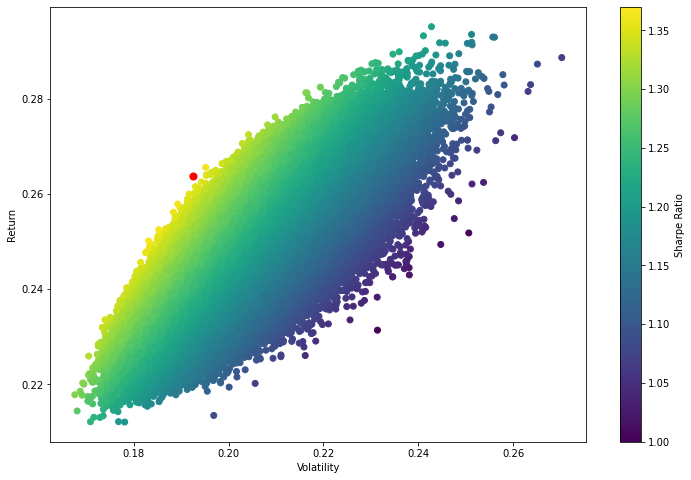

In [33]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(mv, mr,c='red', s=50) # red dot

plt.show()

In [39]:
fy = np.linspace(0.2,0.35,50)

In [40]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(df3.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(df3.cov()*252, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

def min_vol(weights):
    return get_ret_vol_sr(weights)[1]

def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1

In [41]:
a = 1/15
c = ((0,1),)
b = []
d = ()
for i in range(15):
    b.append(a)
    d = d+c

In [42]:
fx = []

for i in fy:
    print(i)
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - i})
    
    result = minimize(min_vol, b, method='SLSQP', bounds=d, constraints=cons)
    fx.append(result['fun'])

0.2
0.20306122448979594
0.20612244897959184
0.20918367346938777
0.2122448979591837
0.2153061224489796
0.21836734693877552
0.22142857142857145
0.22448979591836735
0.22755102040816327
0.23061224489795917
0.2336734693877551
0.23673469387755103
0.23979591836734693
0.24285714285714285
0.24591836734693878
0.24897959183673468
0.25204081632653064
0.25510204081632654
0.25816326530612244
0.2612244897959184
0.2642857142857143
0.2673469387755102
0.27040816326530615
0.27346938775510204
0.27653061224489794
0.2795918367346939
0.2826530612244898
0.2857142857142857
0.28877551020408165
0.29183673469387755
0.29489795918367345
0.2979591836734694
0.3010204081632653
0.3040816326530612
0.30714285714285716
0.31020408163265306
0.31326530612244896
0.3163265306122449
0.3193877551020408
0.3224489795918367
0.32551020408163267
0.32857142857142857
0.33163265306122447
0.3346938775510204
0.3377551020408163
0.3408163265306122
0.3438775510204082
0.3469387755102041
0.35


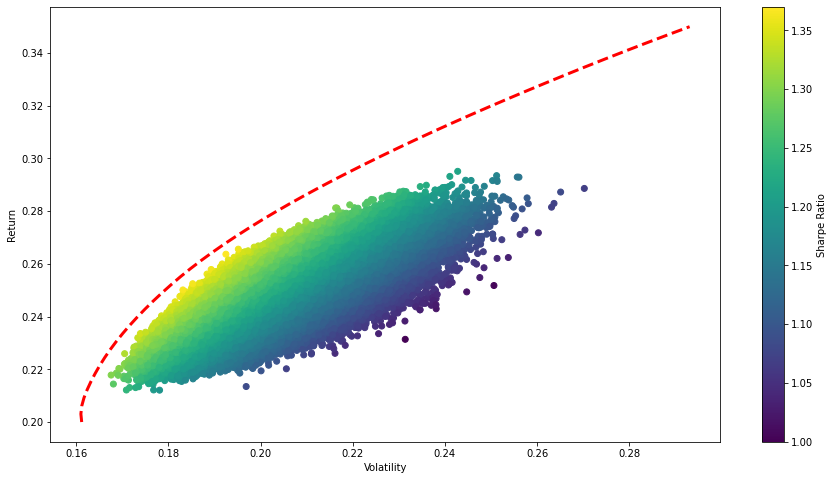

In [43]:
plt.figure(figsize=(15,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(fx,fy, 'r--', linewidth=3)
plt.savefig('cover.png')
plt.show()

In [46]:
mon = all_weights[p,:]*1e7

In [47]:
mon

array([  46817.57583644,   13096.09486726, 1232208.25530209,
         75776.23325932, 1359574.83730104,  208260.58884354,
       1126241.30662468,  701158.77260254, 1113929.46200657,
        176319.89460229, 1339286.73405112,  270198.99178084,
       1130116.6228777 , 1160094.35307028,   46920.27697431])

In [53]:
df2[name[0]][1295]

835.5499877929688

In [55]:
num_sto = []
for i in range(len(mon)):
    num_sto.append(mon[i]/df2[top15[i]][1295])

In [56]:
num_sto

[56.032046580602135,
 3.510452614711329,
 377.4338449877392,
 216.22551182720662,
 564.5371464251755,
 241.36361445929765,
 2095.527548691997,
 190.1138130844427,
 65.2118649170365,
 67.5141246780181,
 877.9329623409517,
 28.38373777833282,
 569.5291009769999,
 232.33949457869306,
 32.577869796428494]

In [57]:
top15

['ADANIPORTS.NS',
 'BRITANNIA.NS',
 'TCS.NS',
 'HINDALCO.NS',
 'HINDUNILVR.NS',
 'TATASTEEL.NS',
 'JSWSTEEL.NS',
 'DIVISLAB.NS',
 'NESTLEIND.NS',
 'ASIANPAINT.NS',
 'TITAN.NS',
 'BAJAJFINSV.NS',
 'RELIANCE.NS',
 'BAJFINANCE.NS',
 'HDFCBANK.NS']